In [2]:
!pip install numpy


In [3]:
!pip install pandas

In [4]:
!pip install mathplot

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mathplot: filename=mathplot-0.1-py3-none-any.whl size=4719 sha256=e1c52ba73c8fff6a7576e03a2dbaac922116bf76870675bc6bd2eef7290b81f4
  Stored in directory: c:\users\vlada\appdata\local\pip\cache\wheels\dd\d4\68\af366d216ed5d3c27d0c518c3adba83a2cbd46f76bcd00e3c2
Successfully built mathplot


In [5]:
!pip install scikit-learn

     ---------------------------------------- 7.1/7.1 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 34.1/34.1 MB 2.2 MB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 799.2 kB/s eta 0:00:00


In [22]:
import os
import opendatasets as od

KAGGLE_URL = 'https://www.kaggle.com/datasets/sadeghjalalian/ufo-sightings-in-usa/download?datasetVersionNumber=1'
DATASET_PATH = '.\dataset'

def fetch_dataset(url = KAGGLE_URL, path = DATASET_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    od.download(url, path)

fetch_dataset()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vladyslavachernorai
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 60.5M/60.5M [00:06<00:00, 9.30MB/s]


In [23]:
!pip install opendatasets

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

DATASET_PATH = "dataset/ufo-sightings-in-usa/nuforc_reports.csv"
dataframe = pd.read_csv(DATASET_PATH)

train_set, test_set = train_test_split(dataframe, test_size=0.2, random_state=42)
dataframe.head(10)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,Viewed some red lights in the sky appearing to...,Visalia,CA,2021-12-15T21:45:00,light,2 minutes,Occurred : 12/15/2021 21:45 (Entered as : 12/...,http://www.nuforc.org/webreports/165/S165881.html,Viewed some red lights in the sky appearing to...,2021-12-19T00:00:00,36.356650,-119.347937
1,Look like 1 or 3 crafts from North traveling s...,Cincinnati,OH,2021-12-16T09:45:00,triangle,14 seconds,Occurred : 12/16/2021 09:45 (Entered as : 12/...,http://www.nuforc.org/webreports/165/S165888.html,Look like 1 or 3 crafts from North traveling s...,2021-12-19T00:00:00,39.174503,-84.481363
2,seen dark rectangle moving slowly thru the sky...,Tecopa,CA,2021-12-10T00:00:00,rectangle,Several minutes,Occurred : 12/10/2021 00:00 (Entered as : 12/...,http://www.nuforc.org/webreports/165/S165810.html,seen dark rectangle moving slowly thru the sky...,2021-12-19T00:00:00,NaN,NaN
3,"One red light moving switly west to east, beco...",Knoxville,TN,2021-12-10T19:30:00,triangle,20-30 seconds,Occurred : 12/10/2021 19:30 (Entered as : 12/...,http://www.nuforc.org/webreports/165/S165825.html,"One red light moving switly west to east, beco...",2021-12-19T00:00:00,35.961561,-83.980115
4,"Bright, circular Fresnel-lens shaped light sev...",Alexandria,VA,2021-12-07T08:00:00,circle,NaN,Occurred : 12/7/2021 08:00 (Entered as : 12/0...,http://www.nuforc.org/webreports/165/S165754.html,"Bright, circular Fresnel-lens shaped light sev...",2021-12-19T00:00:00,38.798958,-77.095133
5,I'm familiar with all the fakery and UFO sight...,Fullerton,CA,2020-07-07T23:00:00,unknown,2 minutes,Occurred : 7/7/2020 23:00 (Entered as : 07/07...,http://www.nuforc.org/webreports/157/S157444.html,I'm familiar with all the fakery and UFO sight...,2020-07-09T00:00:00,33.877422,-117.924978
6,I was driving up lakes mead towards the lake a...,Las Vegas,NV,2020-04-23T03:00:00,oval,10 minutes,Occurred : 4/23/2020 03:00 (Entered as : 4/23...,http://www.nuforc.org/webreports/155/S155608.html,I was driving up lakes mead towards the lake a...,2020-05-01T00:00:00,36.141246,-115.186592
7,Seen a bright spot travelling from east to nor...,Indore City (India),NaN,2020-05-15T19:25:00,NaN,60 seconds,Occurred : 5/15/2020 19:25 (Entered as : 05/1...,http://www.nuforc.org/webreports/155/S155665.html,Seen a bright spot travelling from east to nor...,2020-05-15T00:00:00,NaN,NaN
8,"Wing shaped craft seen at night, no lights, no...",Orem,UT,2020-04-18T23:00:00,other,10 seconds,Occurred : 4/18/2020 23:00 (Entered as : 04/1...,http://www.nuforc.org/webreports/155/S155512.html,"Wing shaped craft seen at night, no lights, no...",2020-05-01T00:00:00,40.294123,-111.701685
9,Driving on I76 near Gulf mills an craft with r...,Gulf Mills,PA,2020-05-13T00:00:00,other,5 minutes,Occurred : 5/13/2020 00:00 (Entered as : 5/13...,http://www.nuforc.org/webreports/155/S155649.html,Driving on I76 near Gulf mills an craft with r...,2020-05-15T00:00:00,NaN,NaN


<AxesSubplot:xlabel='city_latitude', ylabel='city_longitude'>

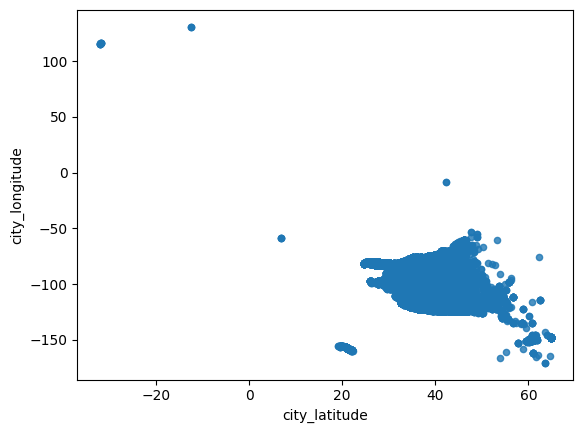

In [42]:
import pandas as pd
import mathplot

DATASET_PATH = "dataset/ufo-sightings-in-usa/nuforc_reports.csv"
dataframe = pd.read_csv(DATASET_PATH)

dataframe.plot(kind ="scatter", x = "city_latitude", y = "city_longitude", alpha=0.8)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

DATASET_PATH = "dataset/ufo-sightings-in-usa/nuforc_reports.csv"
df = pd.read_csv(DATASET_PATH)

# df['date_time'] = pd.to_datetime(df['date_time'])

 # last_25_years = pd.Timestamp.now().year - 25
 # df = df[df['date_time'].dt.year >= last_25_years]

# grouped_data = df.groupby('date_time')['posted'].nunique().reset_index()

df['year'] = pd.to_datetime(df['date_time']).dt.year
grouped_data = df.groupby('year')['posted'].nunique().reset_index()
grouped_data

,year,posted
0,1969.0,129
1,1970.0,124
2,1971.0,103
3,1972.0,142
4,1973.0,171
5,1974.0,173
6,1975.0,198
7,1976.0,186
8,1977.0,191
9,1978.0,199
